# Comparative Analysis

The purpose of this document is to compare detection engines, based on scan of 100 websites.

### 1. Processing the result file

In [90]:
import json
import pandas as pd
import matplotlib 
from datetime import datetime, timedelta

In [ ]:
with open('2024_11_22_14_44_36_756696_phishing_scan_report.json', 'r') as file:
    report_json = json.load(file)
url_results_df = pd.DataFrame(report_json["url_results"])
url_results_df["is_alive_code"]=url_results_df.is_alive.str["response_code"]
url_results_df["is_alive"]=url_results_df.is_alive.str["is_alive"]
url_results_df["virus_total_res"]=url_results_df.is_phishing_sub_results.str[0].str["is_phishing"]
url_results_df["google_sb_api_res"]=url_results_df.is_phishing_sub_results.str[1].str["is_phishing"]
url_results_df["chrome_no_sb_res"]=url_results_df.is_phishing_sub_results.str[2].str["is_phishing"]
url_results_df["chrome_sb_res"]=url_results_df.is_phishing_sub_results.str[3].str["is_phishing"]

url_results_df.fillna("None", inplace=True)
url_results_alive_df=url_results_df[url_results_df.is_alive==True]

total_num =  report_json["statistics"]["urls_number"]

# 2. Analysis

## 2.1. Alive statistics

In [60]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

<Axes: title={'center': 'Alive websites'}, ylabel='count'>

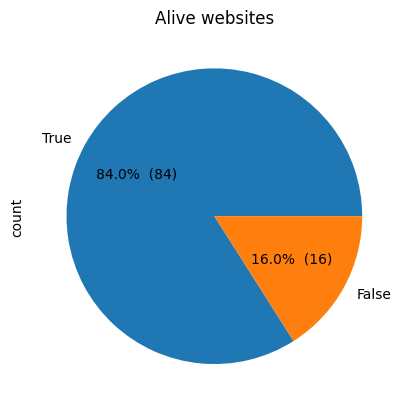

In [61]:
alive_pct = report_json["statistics"]["alive_stats"]["alive_urls_pct"]
alive_num = report_json["statistics"]["alive_stats"]["alive_urls"]
url_results_df.is_alive.value_counts().plot(kind="pie", title="Alive websites", autopct=make_autopct(url_results_df.is_alive.value_counts()))

In [62]:
alive_num

84

## 2.2. Comparision of the detection mechanisms effectiveness

### 2.2.1. Virus Total API

<Axes: title={'center': 'Virus Total API results'}, ylabel='count'>

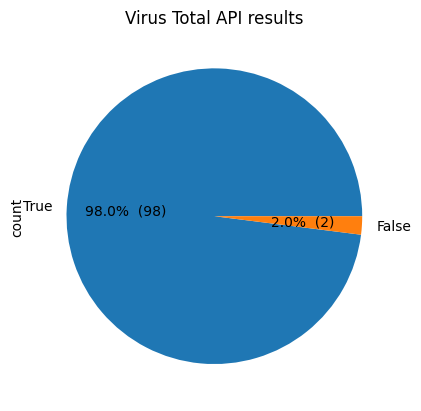

In [66]:
url_results_df.virus_total_res.value_counts().plot(kind="pie", title="Virus Total API results", autopct=make_autopct(url_results_df.virus_total_res.value_counts()))

### 2.2.2. Google Safe Browsing API results

<Axes: title={'center': 'Google Safe Browsing API results'}, ylabel='count'>

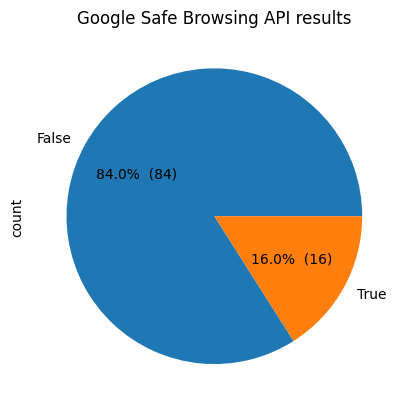

In [67]:
url_results_df.google_sb_api_res.value_counts().plot(kind="pie", title="Google Safe Browsing API results", autopct=make_autopct(url_results_df.google_sb_api_res.value_counts()))

### 2.2.3. Google Chrome Safe Browsing

<Axes: title={'center': 'Google Chrome without Safe Browsing results'}, ylabel='count'>

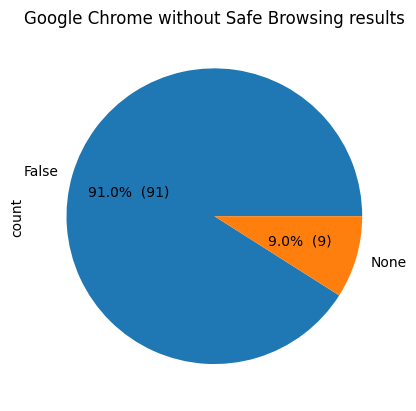

In [70]:
url_results_df.chrome_no_sb_res.value_counts().plot(kind="pie", title="Google Chrome without Safe Browsing results", autopct=make_autopct(url_results_df.chrome_no_sb_res.value_counts()))

<Axes: title={'center': 'Google Chrome Safe Browsing results'}, ylabel='count'>

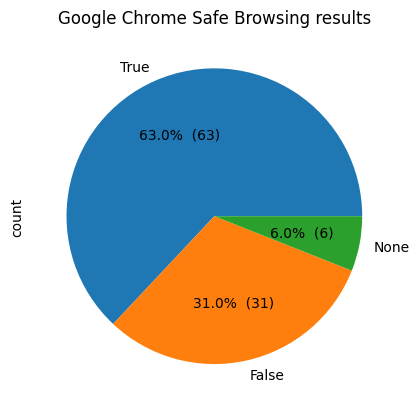

In [71]:
url_results_df.chrome_sb_res.value_counts().plot(kind="pie", title="Google Chrome Safe Browsing results", autopct=make_autopct(url_results_df.chrome_sb_res.value_counts()))

## 2.3. Comparision of duration of scan using each detection engine

In [112]:
times = report_json["statistics"]["scanners_times_stats"]
times

[{'scanner_name': 'VirusTotalScanner', 'scan_time': '0:00:43.356706'},
 {'scanner_name': 'GoogleSafeBrowsingAPIScanner',
  'scan_time': '0:00:00.401503'},
 {'scanner_name': 'AliveScanner', 'scan_time': '0:00:02.994994'},
 {'scanner_name': 'ChromeSafeBrowsingScanner', 'scan_time': '0:01:14.776480'}]